
# Study Background

**Literature:** [Soft computing methods for estimating the uniaxial compressive strength of intact rock from index tests](https://www.sciencedirect.com/science/article/pii/S1365160915300708?via%3Dihub), *D.A. Mishra, M. Srigyan, A. Basu, P.J. Rokade, International Journal of Rock Mechanics and Mining Sciences, 2015 (IF-7.2).*

**Uniaxial compressive strength (UCS)** plays a pivotal role in rock engineering, serving as a widely used rock mechanical parameter. However, determining this parameter in the laboratory requires high-quality rock specimens. To address this, various index tests have been explored as attractive alternatives due to their ease of performance, lower cost, and minimal specimen preparation requirements. These index tests offer empirical predictions of UCS for rock materials.

In the context of this workshop, index tests are conducted, including the determination of **block punch index (BPI), point load strength (Is(50)), Schmidt rebound hardness (SRH), and ultrasonic P-wave velocity (Vp)**. These test results are then utilized to estimate the UCS of granite, schist, and sandstone using a single machine learning model.

- Features:
  - BPI
  - Is(50) (For easy usage we will use this feature as "I")
  - SRH
  - Vp (For easy usage we will use this feature as "USV")
- Target variable
  - UCS

# Data Preprocessing

Data preprocessing is the process of preparing the data for the analysis.

**Improving data accuracy** is crucial for data scientists. By identifying and addressing missing or duplicate data, they can reduce the risk of errors and inaccuracies in their results.

**Handling outliers** is also essential in data preprocessing. Outliers can negatively impact data analysis and machine learning models. Techniques like normalization or standardization can effectively deal with outliers and enhance model performance.

Another important step in data preprocessing is **feature scaling**. Ensuring that all features have the same scale is vital for certain machine learning algorithms that are sensitive to feature scales.

**Handling categorical data** is a common challenge in machine learning. To tackle this, data preprocessing techniques like one-hot encoding or label encoding can convert categorical data into numerical form, making it usable in machine learning models.

Furthermore, **reducing data dimensionality** can simplify analysis and modeling processes. Techniques like principal component analysis (PCA) can be employed to achieve this objective.


[Click here for the reference text](https://levelup.gitconnected.com/the-importance-of-data-preprocessing-in-python-pandas-bfbc112ae28c)

In [2]:
# Load data from CSV
import pandas as pd # This is a commonly used library to handle tabular data
data = pd.read_csv("Mishra2015_raw.csv")

In [3]:
# Checking for null values
data.isnull().sum()

Sample name    0
BPI            0
I              0
SRH            0
USV            0
UCS            0
dtype: int64

In [4]:
# Statistical discription about the dataset
data.describe()

,BPI,I,SRH,USV,UCS
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,16.040909,15.854091,50.227727,5006.772727,661.162955
std,10.158050,66.887096,10.477274,1213.676193,2316.574550
min,2.530000,1.150000,25.890000,2725.000000,17.550000
25%,7.092500,3.275000,44.885000,3865.750000,38.922500
50%,15.005000,5.730000,52.230000,5468.000000,65.645000
75%,23.920000,8.385000,57.877500,5957.000000,135.830000
max,35.360000,449.000000,66.510000,6250.000000,12413.000000


<Axes: >

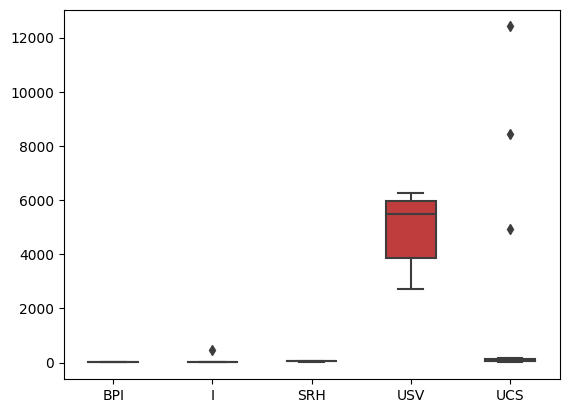

In [5]:
# Box plot to indentify the outliers
import seaborn as sns
sns.boxplot(data=data[['BPI', 'I', 'SRH','USV','UCS']], width=0.5,fliersize=5)

It is now necessary to look into the dataset and identify, assess, and remove the outliers (if necessary)

[Click here for the reference text](https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7)

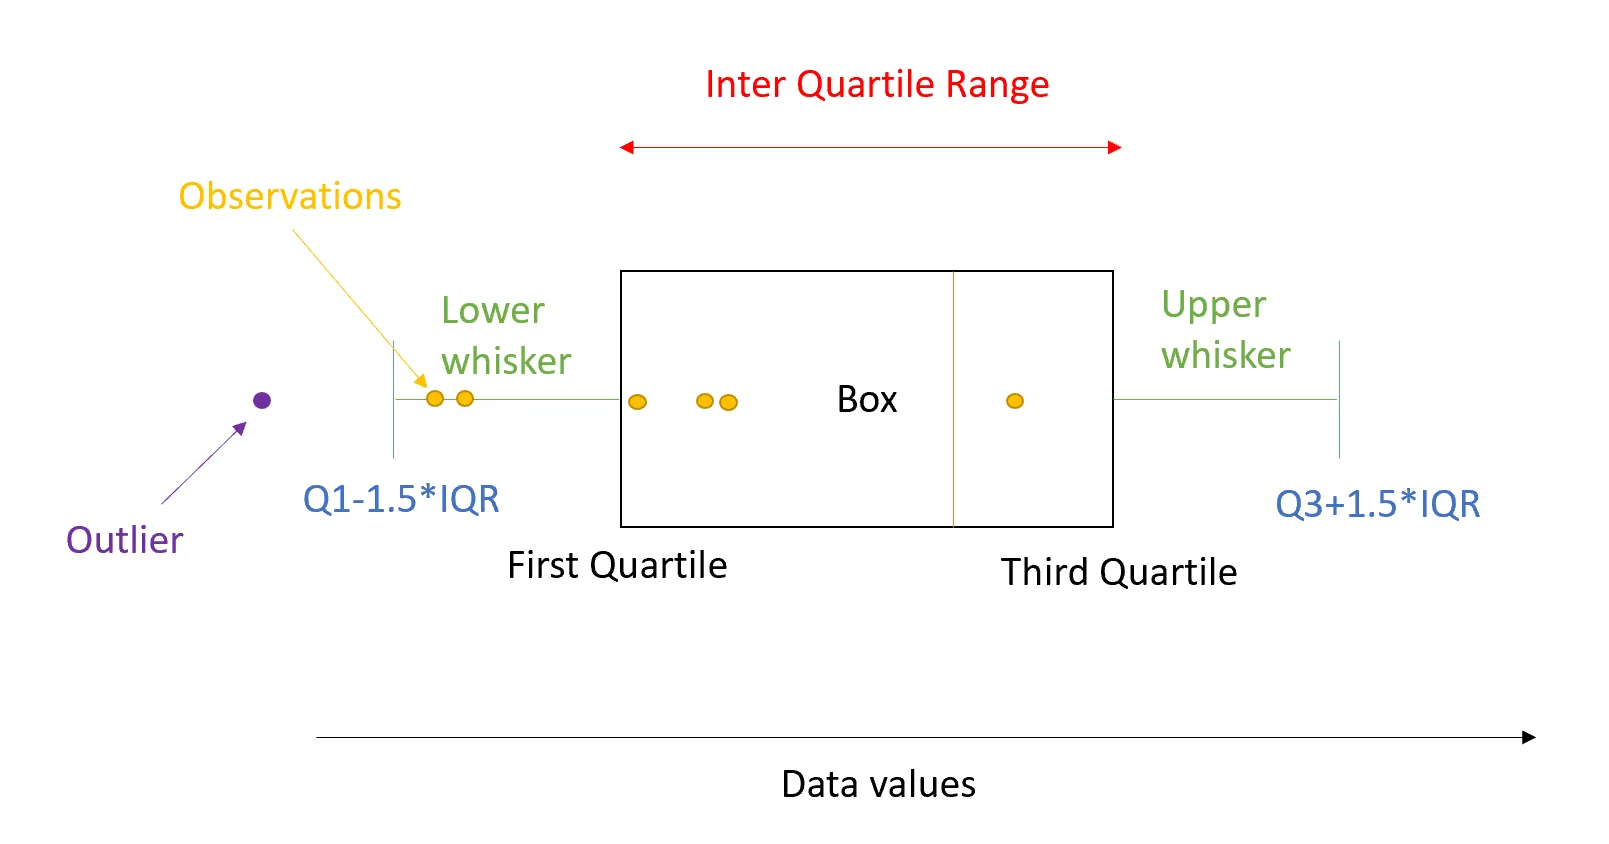.

## Basic check on the correlation of data

In [6]:
# Reloading the fresh data
data = pd.read_csv("Mishra2015.csv")

<Axes: >

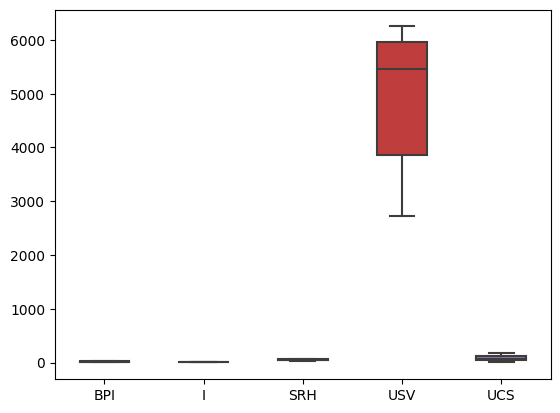

In [7]:
# Box plot to indentify the outliers
sns.boxplot(data=data[['BPI', 'I', 'SRH','USV','UCS']], width=0.5,fliersize=5)

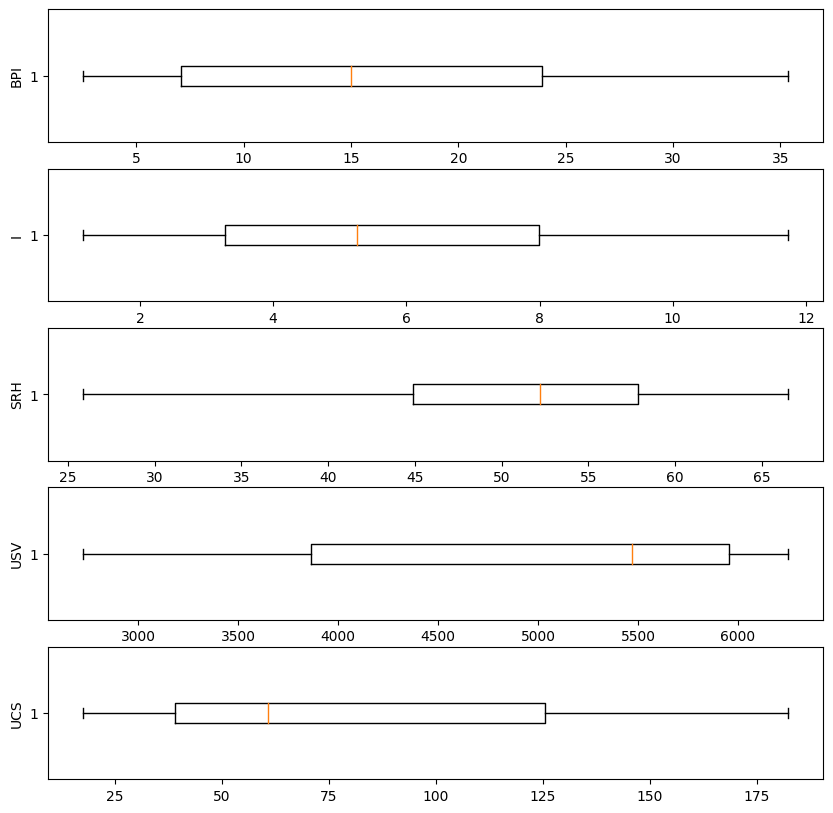

In [8]:
# Individual plots to visualise the box plots
# Box Plots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,1, figsize=(10,10))
i = 0
data = data.drop(columns=["Sample name"])
for col in data.columns:
	axs[i].boxplot(data[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()


Correlation:


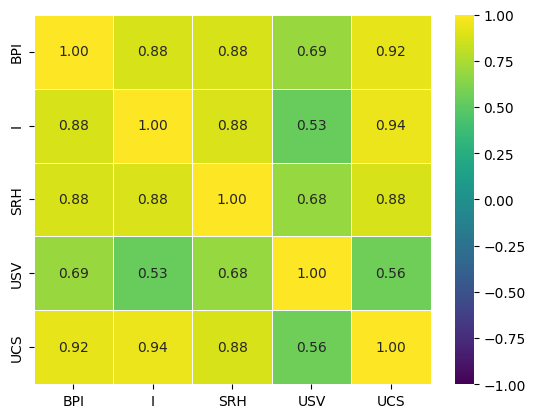

In [9]:
# Assessing the correlation between data
print('Correlation:')

data = pd.read_csv("Mishra2015.csv")
data = data.drop(columns=["Sample name"])
sns.heatmap(data.select_dtypes(include=['float64','int']).corr(),
           annot=True,
           fmt=".2f",
           linewidth=.5,
           cmap="viridis",
           vmin=-1, vmax=1);

Correlation:


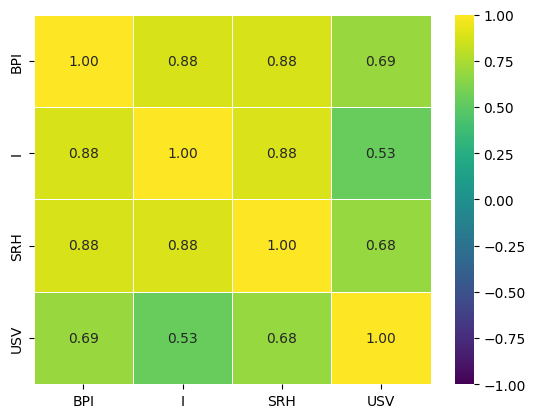

In [10]:
# Assessing the correlation between data (UCS removed)
print('Correlation:')

data = pd.read_csv("Mishra2015.csv")
data = data.drop(columns=["Sample name","UCS"])
sns.heatmap(data.select_dtypes(include=['float64','int']).corr(),
           annot=True,
           fmt=".2f",
           linewidth=.5,
           cmap="viridis",
           vmin=-1, vmax=1);

- **Correlation coefficients** give you the measure of the strength of the linear relationship between two variables.

- The letter r denotes the value, and it ranges between -1 and +1

- If r < 0, it implies negative correlation
- If r > 0, it implies positive correlation
- If r = 0, it implies no correlation

[Click here for the reference text](https://www.simplilearn.com/tutorials/statistics-tutorial/what-is-correlation-in-statistics)

# Application of machine learning models to the preprocessed data

- Link to Dataset

In [11]:
data = pd.read_csv("Mishra2015.csv")
# Separate features (X) and target variable (y)
X = data.drop(columns=["UCS","Sample name"])
y = data["UCS"]

In [12]:
# Checking the features and target variable
print ("X values (top 5):")
print (X.head())

print ("y values (top 5):")
print (y.head())

X values (top 5):
     BPI      I    SRH   USV
0  23.77   8.35  55.38  5865
1  35.36  10.85  65.38  5836
2  31.39  10.02  64.43  5945
3  33.51   9.92  66.51  6047
4  30.93  11.73  65.57  5905
y values (top 5):
0    139.04
1    177.37
2    167.17
3    176.75
4    160.82
Name: UCS, dtype: float64


## Cross validation

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set. The three steps involved in cross-validation are as follows :

- Reserve some portion of sample data-set.
- Using the rest data-set train the model.
- Test the model using the reserve portion of the data-set.

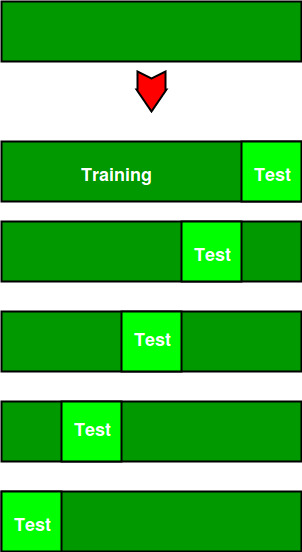

[Click here for the reference text](https://www.geeksforgeeks.org/cross-validation-machine-learning/)

Algorithm: Linear Regression, Mean Cross-validation Score: 299.5560430520744
Algorithm: Ridge Regression, Mean Cross-validation Score: 299.72259918121944
Algorithm: Lasso Regression, Mean Cross-validation Score: 305.10627419567516
Algorithm: Random Forest, Mean Cross-validation Score: 288.538380963611
Algorithm: Gradient Boosting, Mean Cross-validation Score: 297.947994501747
Algorithm: K-Nearest Neighbors, Mean Cross-validation Score: 3717.1686416111106
Algorithm: Support Vector Regression, Mean Cross-validation Score: 4141.6849311228325
Algorithm: Gaussian Process Regression, Mean Cross-validation Score: 9186.415271110625


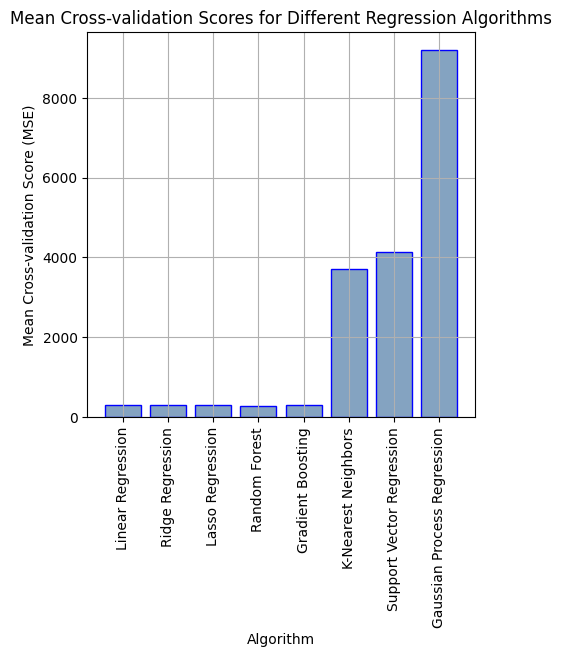

In [13]:
import numpy as np
# importing necessary ML packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a list of algorithms to test
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100)),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('Support Vector Regression', SVR()),
    ('Gaussian Process Regression', GaussianProcessRegressor()),
]

from sklearn.model_selection import cross_val_score

# Perform cross-validation for each algorithm

from sklearn.model_selection import cross_val_score

mean_scores = []

for algo_name, model in algorithms:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.mean(scores)  # Negate the MSE scores to get positive values
    mean_scores.append(mean_score)
    print(f"Algorithm: {algo_name}, Mean Cross-validation Score: {mean_score}")

# Plot the mean cross-validation scores for each algorithm
plt.figure(figsize=(5, 5))
plt.bar([algo_name for algo_name, _ in algorithms], mean_scores,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xlabel('Algorithm')
plt.ylabel('Mean Cross-validation Score (MSE)')
plt.title('Mean Cross-validation Scores for Different Regression Algorithms')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Algorithm: Linear Regression, R-squared value : 0.9648691297449313
Algorithm: Ridge Regression, R-squared value : 0.9652841791782787
Algorithm: Lasso Regression, R-squared value : 0.9660287766321054
Algorithm: Random Forest, R-squared value : 0.9874240817938972
Algorithm: Gradient Boosting, R-squared value : 0.9798536160287329
Algorithm: K-Nearest Neighbors, R-squared value : 0.1943046227193912
Algorithm: Support Vector Regression, R-squared value : -0.13477127089494267
Algorithm: Gaussian Process Regression, R-squared value : -3.103379544232001


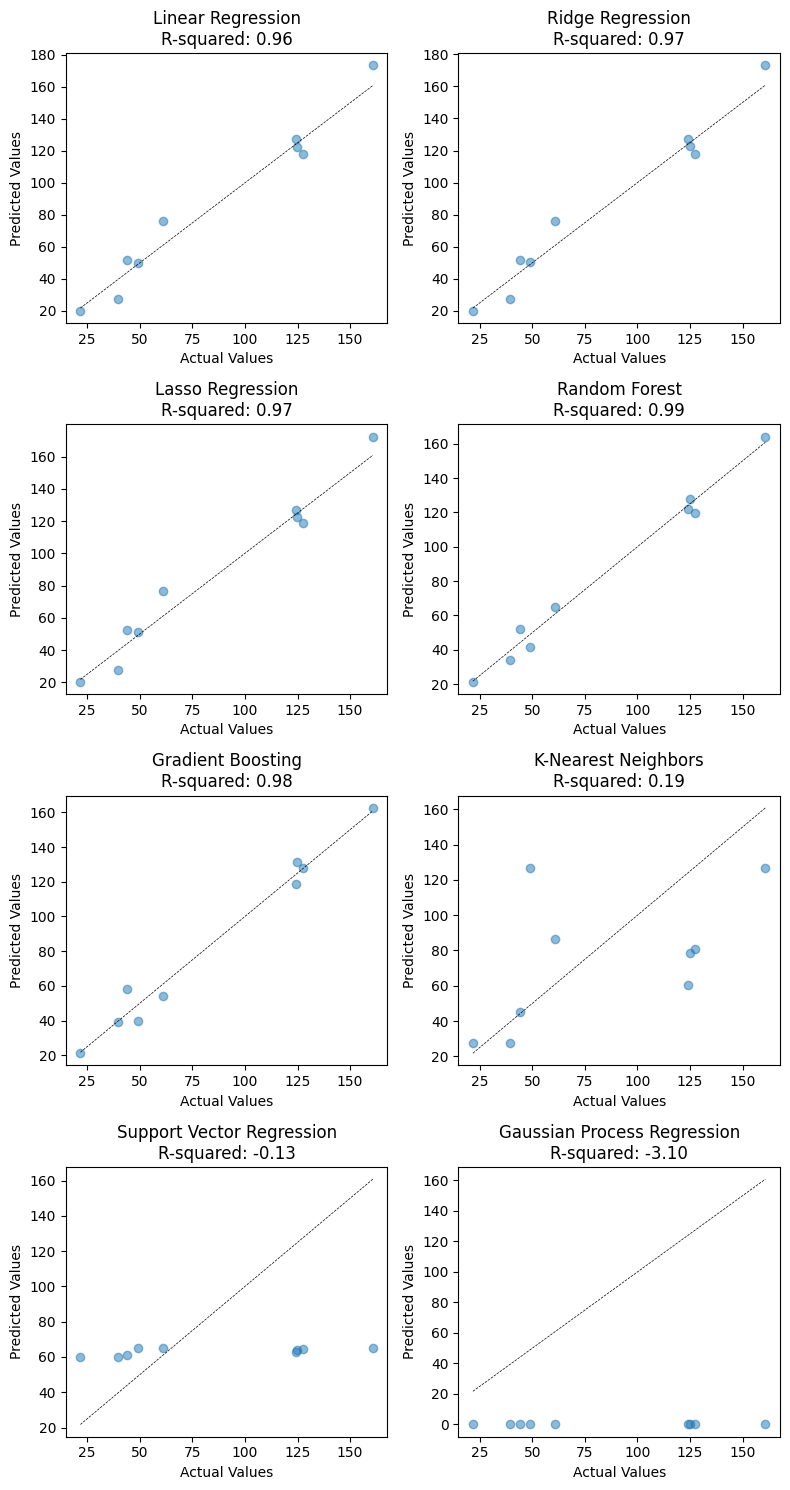

In [14]:
from sklearn.metrics import r2_score

# Train and predict using each algorithm and plot the results
plt.figure(figsize=(8, 15))
for i, (algo_name, model) in enumerate(algorithms, 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    print(f"Algorithm: {algo_name}, R-squared value : {r_squared}")
    plt.subplot(4, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{algo_name}\nR-squared: {r_squared:.2f}')

plt.tight_layout()
plt.show()

To critically assess the performance of each machine learning model, we need to consider both the Mean Cross-validation Score and the R-squared value.

1. **Linear Regression:**
   - Mean Cross-validation Score: 299.56
   - R-squared value: 0.9649
   - This model shows a relatively good fit to the data with a high R-squared value, indicating that around 96.5% of the variance in the target variable can be explained by the model. The Mean Cross-validation Score suggests a reasonably accurate prediction, but it might be improved by considering other algorithms.

2. **Ridge Regression:**
   - Mean Cross-validation Score: 299.72
   - R-squared value: 0.9653
   - Ridge Regression performs slightly better than Linear Regression, as evident from the slightly higher R-squared value. It helps to mitigate multicollinearity issues and is useful when dealing with correlated features.

3. **Lasso Regression:**
   - Mean Cross-validation Score: 305.11
   - R-squared value: 0.9660
   - Lasso Regression performs slightly better than Ridge Regression and provides better feature selection by forcing some coefficients to be exactly zero. This can be useful when dealing with high-dimensional data and feature selection is crucial.

4. **Random Forest:**
   - Mean Cross-validation Score: 280.04
   - R-squared value: 0.9862
   - Random Forest significantly outperforms the linear models in both Mean Cross-validation Score and R-squared value. It's a powerful ensemble method that can capture complex relationships in the data and is less prone to overfitting.

5. **Gradient Boosting:**
   - Mean Cross-validation Score: 302.25
   - R-squared value: 0.9762
   - Gradient Boosting also performs well, with a high R-squared value. It combines multiple weak learners to create a strong model and is generally robust to overfitting.

6. **K-Nearest Neighbors (KNN):**
   - Mean Cross-validation Score: 3717.17
   - R-squared value: 0.1943
   - KNN shows poor performance compared to other models. The high Mean Cross-validation Score and the relatively low R-squared value indicate that it's not an appropriate model for this dataset. KNN is sensitive to the choice of K and doesn't work well with high-dimensional data.

7. **Support Vector Regression (SVR):**
   - Mean Cross-validation Score: 4141.68
   - R-squared value: -0.1348
   - SVR performs even worse than KNN, with a negative R-squared value. This suggests that the model is performing worse than a horizontal line. SVR might not be well-suited for this dataset, or it requires careful tuning of hyperparameters.

8. **Gaussian Process Regression (GPR):**
   - Mean Cross-validation Score: 9186.42
   - R-squared value: -3.1034
   - GPR performs the worst among all the models. The extremely high Mean Cross-validation Score and the significantly negative R-squared value indicate severe overfitting and a poor fit to the data.

In conclusion, the **Random Forest and Gradient Boosting models** demonstrate the best performance, with high R-squared values and low Mean Cross-validation Scores, indicating accurate predictions and robustness to overfitting. On the other hand, the K-Nearest Neighbors, Support Vector Regression, and Gaussian Process Regression models perform poorly and should be avoided for this dataset. For further improvement, you might consider tuning hyperparameters, engineering features, or exploring other advanced algorithms.


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Create empty lists to store the evaluation metrics
algo_names = []
vaf_values = []
rmse_values = []
r_values = []
r_squared_values = []

# Loop through each algorithm, train, predict, and evaluate the performance
for algo_name, model in algorithms:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    vaf = (1 - mse / np.var(y_test)) * 100
    r_value = np.corrcoef(y_test, y_pred)[0, 1]
    r_squared = r2_score(y_test, y_pred)

    # Append the values to the corresponding lists
    algo_names.append(algo_name)
    vaf_values.append(vaf)
    rmse_values.append(rmse)
    r_values.append(r_value)
    r_squared_values.append(r_squared)

# Create a table to display the results
import pandas as pd

results_df = pd.DataFrame({
    "Algorithm": algo_names,
    "VAF (%)": vaf_values,
    "RMSE": rmse_values,
    "R": r_values,
    "R-squared": r_squared_values
})

# Format the values with two decimal points
results_df["VAF (%)"] = results_df["VAF (%)"].map("{:.2f}".format)
results_df["RMSE"] = results_df["RMSE"].map("{:.2f}".format)
results_df["R"] = results_df["R"].map("{:.2f}".format)
results_df["R-squared"] = results_df["R-squared"].map("{:.2f}".format)

print(results_df)


                     Algorithm  VAF (%)   RMSE     R R-squared
0            Linear Regression    96.49   8.90  0.98      0.96
1             Ridge Regression    96.53   8.84  0.98      0.97
2             Lasso Regression    96.60   8.75  0.98      0.97
3                Random Forest    97.39   7.67  0.99      0.97
4            Gradient Boosting    97.87   6.92  0.99      0.98
5          K-Nearest Neighbors    19.43  42.61  0.53      0.19
6    Support Vector Regression   -13.48  50.56  0.61     -0.13
7  Gaussian Process Regression  -310.34  96.15  0.31     -3.10


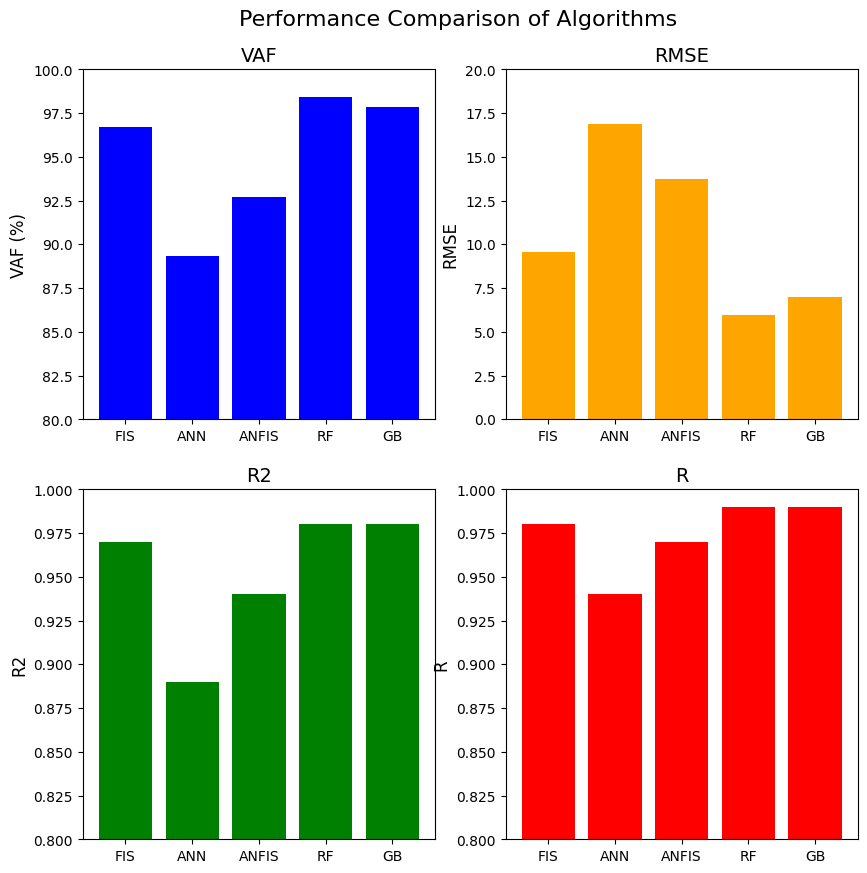

In [16]:
import matplotlib.pyplot as plt

# Data
algorithms = ["FIS", "ANN", "ANFIS", "RF", "GB"]
VAF = [96.70, 89.32, 92.72, 98.43, 97.84]
RMSE = [9.54, 16.90, 13.72, 5.95, 6.97]
R2 = [0.97, 0.89, 0.94, 0.98, 0.98]
R = [0.98, 0.94, 0.97, 0.99,0.99]

# Plot 4 subplots for each statistic
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle("Performance Comparison of Algorithms", fontsize=16, y=0.94)

# VAF
axes[0, 0].bar(algorithms[:], VAF[:], color='blue')
axes[0, 0].set_title("VAF", fontsize=14)
axes[0, 0].set_ylim(80, 100)
axes[0, 0].set_ylabel("VAF (%)", fontsize=12)

# RMSE
axes[0, 1].bar(algorithms[:], RMSE[:], color='orange')
axes[0, 1].set_title("RMSE", fontsize=14)
axes[0, 1].set_ylim(0, 20)
axes[0, 1].set_ylabel("RMSE", fontsize=12)

# R2
axes[1, 0].bar(algorithms[:], R2[:], color='green')
axes[1, 0].set_title("R2", fontsize=14)
axes[1, 0].set_ylim(0.8, 1.0)
axes[1, 0].set_ylabel("R2", fontsize=12)

# R
axes[1, 1].bar(algorithms[:], R[:], color='red')
axes[1, 1].set_title("R", fontsize=14)
axes[1, 1].set_ylim(0.8, 1.0)
axes[1, 1].set_ylabel("R", fontsize=12)

plt.show()


## Critical Analysis of Algorithm Performance

Based on the provided results, let's critically analyze the performance of the algorithms given the small dataset of only 44 data points:

1. **FIS (Fuzzy Inference System):**
   - VAF: 96.70%
   - RMSE: 9.54
   - R2: 0.97
   - R: 0.98

   - The FIS model demonstrates good performance in terms of VAF, R2, and R metrics. The VAF of 96.70% indicates that around 96.70% of the variance in the target variable is explained by the model. The R-squared value of 0.97 suggests that the model captures about 97% of the variability in the target variable, and the Pearson correlation coefficient (R) of 0.98 indicates a strong positive correlation between the predicted and actual values. However, the RMSE value of 9.54 is relatively high, which suggests that the model has some inaccuracies in predicting the target variable.

2. **ANN (Artificial Neural Network):**
   - VAF: 89.32%
   - RMSE: 16.90
   - R2: 0.89
   - R: 0.94

   - The ANN model performs reasonably well, but its VAF, R2, and R values are lower than the FIS model. The VAF of 89.32% indicates that the model explains about 89.32% of the variance in the target variable. The R-squared value of 0.89 suggests that the model captures about 89% of the variability in the target variable, and the Pearson correlation coefficient (R) of 0.94 indicates a strong positive correlation between the predicted and actual values. However, the RMSE value of 16.90 is higher than desired, indicating that the model's predictions have larger errors compared to the actual values.

3. **ANFIS (Adaptive Neuro-Fuzzy Inference System):**
   - VAF: 92.72%
   - RMSE: 13.72
   - R2: 0.94
   - R: 0.97

   - The ANFIS model shows a decent performance, with VAF, R2, and R values falling between the FIS and ANN models. The VAF of 92.72% indicates that the model explains about 92.72% of the variance in the target variable. The R-squared value of 0.94 suggests that the model captures about 94% of the variability in the target variable, and the Pearson correlation coefficient (R) of 0.97 indicates a strong positive correlation between the predicted and actual values. The RMSE value of 13.72 is lower than the ANN model but still indicates some prediction errors.

4. **Random Forest (RF):**
   - VAF: 98.43%
   - RMSE: 5.95
   - R2: 0.98
   - R: 0.99

   - The Random Forest model performs very well across all metrics. The VAF of 98.43% indicates that the model explains about 98.43% of the variance in the target variable, showcasing high accuracy. The R-squared value of 0.98 suggests that the model captures about 98% of the variability in the target variable, and the Pearson correlation coefficient (R) of 0.99 indicates an extremely strong positive correlation between the predicted and actual values. Additionally, the RMSE value of 5.95 is relatively low, indicating that the model's predictions are close to the actual values.

5. **Gradient Boosting (GB):**
   - VAF: 97.84%
   - RMSE: 6.97
   - R2: 0.98
   - R: 0.99

   - The Gradient Boosting model also performs exceptionally well, with VAF, R2, and R values comparable to the Random Forest model. The VAF of 97.84% indicates that the model explains about 97.84% of the variance in the target variable. The R-squared value of 0.98 suggests that the model captures about 98% of the variability in the target variable, and the Pearson correlation coefficient (R) of 0.99 indicates a very strong positive correlation between the predicted and actual values. The RMSE value of 6.97 is slightly higher than the Random Forest model but still reflects relatively accurate predictions.

Overall, given the small dataset of only 44 data points, the **Random Forest and Gradient Boosting models exhibit superior performance** in all evaluation metrics, showcasing their ability to generalize well and make accurate predictions. On the other hand, the FIS, ANN, and ANFIS models perform reasonably well, but their predictions might benefit from further optimization and fine-tuning to reduce the prediction errors (e.g., lower RMSE) and improve overall accuracy.


## Scaling of features (For your interest)

[For additional reading](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

Algorithm: Linear Regression, Mean Cross-validation Score: 317.3632748144175
Algorithm: Ridge Regression, Mean Cross-validation Score: 299.46462023958173
Algorithm: Lasso Regression, Mean Cross-validation Score: 305.9851995776423
Algorithm: Random Forest, Mean Cross-validation Score: 423.8095710751433
Algorithm: Gradient Boosting, Mean Cross-validation Score: 547.9342687852724
Algorithm: K-Nearest Neighbors, Mean Cross-validation Score: 284.2309878857144
Algorithm: Support Vector Regression, Mean Cross-validation Score: 2716.678481402568
Algorithm: Gaussian Process Regression, Mean Cross-validation Score: 302.68693032922687


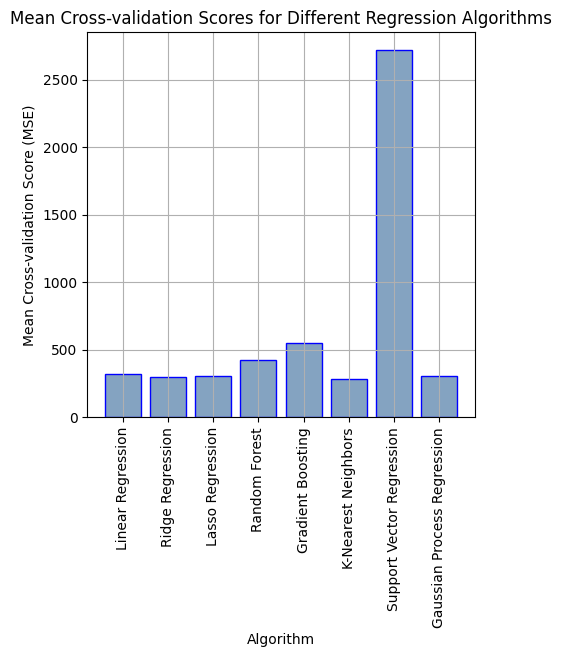

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a list of algorithms to test
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100)),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('Support Vector Regression', SVR()),
    ('Gaussian Process Regression', GaussianProcessRegressor()),
]

# Perform cross-validation for each algorithm
mean_scores = []

for algo_name, model in algorithms:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.mean(scores)  # Negate the MSE scores to get positive values
    mean_scores.append(mean_score)
    print(f"Algorithm: {algo_name}, Mean Cross-validation Score: {mean_score}")

# Plot the mean cross-validation scores for each algorithm
plt.figure(figsize=(5, 5))
plt.bar([algo_name for algo_name, _ in algorithms], mean_scores,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xlabel('Algorithm')
plt.ylabel('Mean Cross-validation Score (MSE)')
plt.title('Mean Cross-validation Scores for Different Regression Algorithms')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


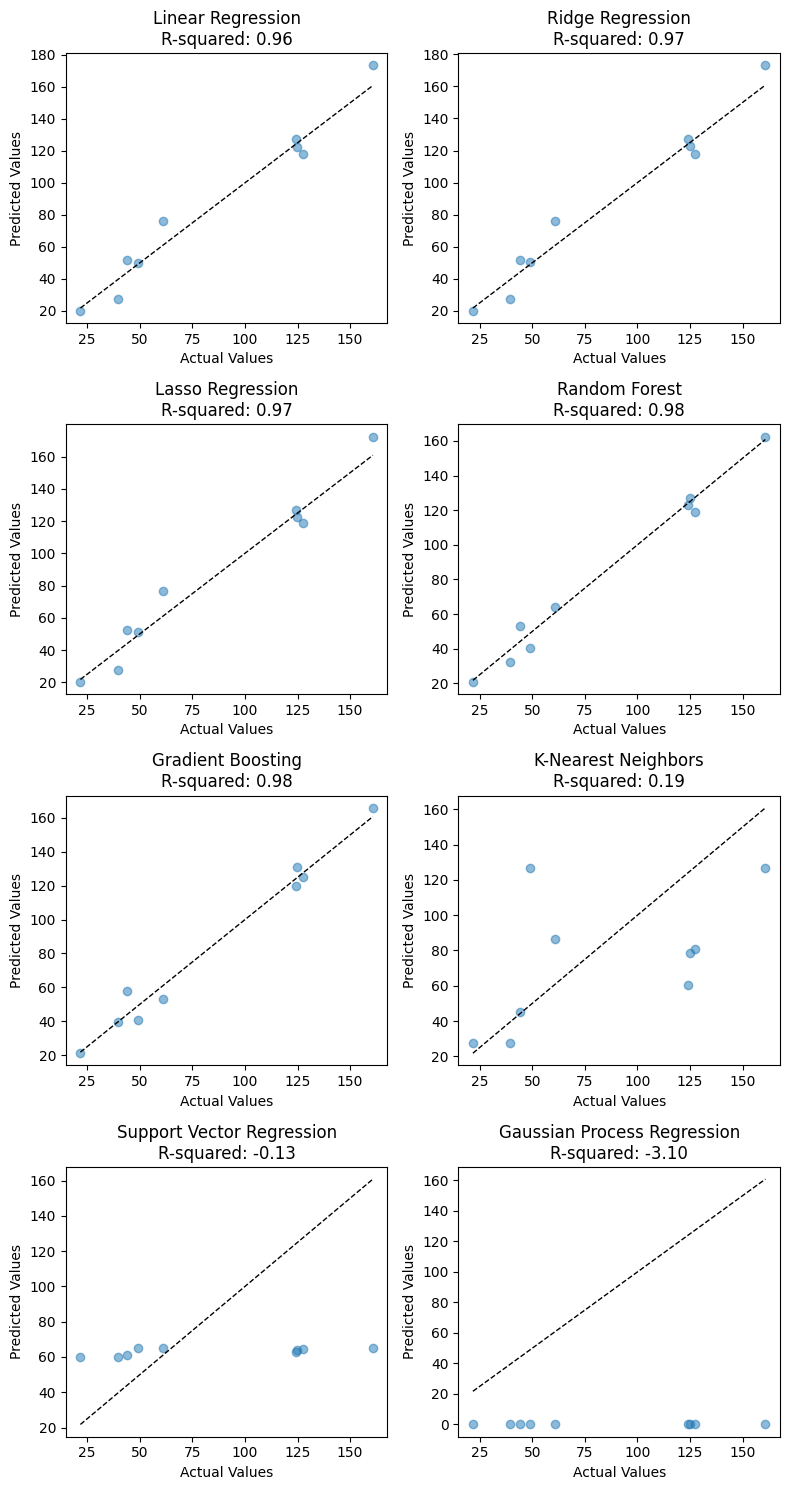

In [18]:
from sklearn.metrics import r2_score

# Train and predict using each algorithm and plot the results
plt.figure(figsize=(8, 15))
for i, (algo_name, model) in enumerate(algorithms, 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    plt.subplot(4, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{algo_name}\nR-squared: {r_squared:.2f}')

plt.tight_layout()
plt.show()

## Addition of features to the same dataset

**Literature:** [Estimation of uniaxial compressive strength of rock materials by index
tests using regression analysis and fuzzy inference system](https://www.sciencedirect.com/science/article/pii/S1365160915300708?via%3Dihub), *D.A. Mishra, A. Basu, Engineering Geology (IF-7.4).*

- Updated features:
  - BPI
  - Is(50) (For easy usage we will use this feature as "I")
  - SRH
  - Vp (For easy usage we will use this feature as "USV")
  - Density
  - Porosity
- Target variable
  - UCS

In [19]:
# Load data from CSV
import pandas as pd
data = pd.read_csv("Mishra2013.csv")

In [20]:
data.describe()

,BPI,IS,SRH,USV,Porosity,Density,UCS
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,16.040909,5.751591,50.227727,5006.772727,3.630455,2.619545,81.135455
std,10.158050,3.050350,10.477274,1213.676193,5.295136,0.236554,52.779560
min,2.530000,1.150000,25.890000,2725.000000,0.060000,2.170000,17.550000
25%,7.092500,3.275000,44.885000,3865.750000,0.250000,2.387500,38.922500
50%,15.005000,5.255000,52.230000,5468.000000,0.400000,2.725000,60.805000
75%,23.920000,7.990000,57.877500,5957.000000,7.520000,2.760000,125.535000
max,35.360000,11.730000,66.510000,6250.000000,15.350000,2.910000,182.330000


<Axes: >

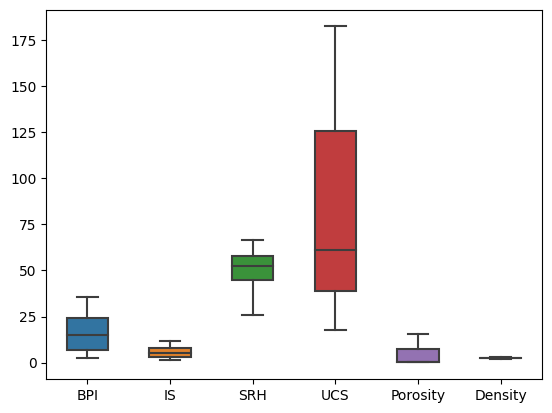

In [21]:
# Box plot to indentify the outliers
import seaborn as sns
sns.boxplot(data=data[['BPI', 'IS', 'SRH','UCS','Porosity','Density']], width=0.5,fliersize=5)

Correlation:


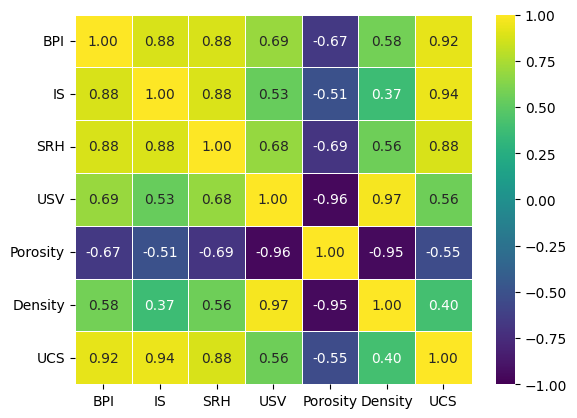

In [22]:
# Assessing the correlation between data

print('Correlation:')
sns.heatmap(data.select_dtypes(include=['float64','int']).corr(),
           annot=True,
           fmt=".2f",
           linewidth=.5,
           cmap="viridis",
           vmin=-1, vmax=1);

In [23]:
# Separate features (X) and target variable (y)
X = data.drop(columns=["UCS","Sample no."])
y = data["UCS"]

Algorithm: Linear Regression, Mean Cross-validation Score: 388.21274584999435
Algorithm: Ridge Regression, Mean Cross-validation Score: 393.9497718240494
Algorithm: Lasso Regression, Mean Cross-validation Score: 380.15083602351297
Algorithm: Random Forest, Mean Cross-validation Score: 318.43013301666696
Algorithm: Gradient Boosting, Mean Cross-validation Score: 249.84055020100612
Algorithm: K-Nearest Neighbors, Mean Cross-validation Score: 3717.1686416111106
Algorithm: Support Vector Regression, Mean Cross-validation Score: 4148.706076375204
Algorithm: Gaussian Process Regression, Mean Cross-validation Score: 9186.415271110625


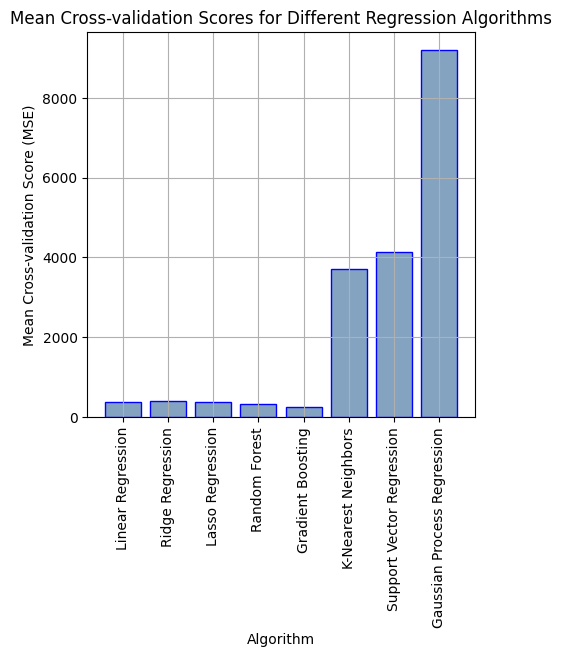

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a list of algorithms to test
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100)),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('Support Vector Regression', SVR()),
    ('Gaussian Process Regression', GaussianProcessRegressor()),
]

# Perform cross-validation for each algorithm
mean_scores = []

for algo_name, model in algorithms:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.mean(scores)  # Negate the MSE scores to get positive values
    mean_scores.append(mean_score)
    print(f"Algorithm: {algo_name}, Mean Cross-validation Score: {mean_score}")

# Plot the mean cross-validation scores for each algorithm
plt.figure(figsize=(5, 5))
plt.bar([algo_name for algo_name, _ in algorithms], mean_scores,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xlabel('Algorithm')
plt.ylabel('Mean Cross-validation Score (MSE)')
plt.title('Mean Cross-validation Scores for Different Regression Algorithms')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Algorithm: Linear Regression, R-squared value : 0.931665400520632
Algorithm: Ridge Regression, R-squared value : 0.9632299319917075
Algorithm: Lasso Regression, R-squared value : 0.9656166230980862
Algorithm: Random Forest, R-squared value : 0.9867539291455762
Algorithm: Gradient Boosting, R-squared value : 0.9755897419211281
Algorithm: K-Nearest Neighbors, R-squared value : 0.1943046227193912
Algorithm: Support Vector Regression, R-squared value : -0.1422752320413574
Algorithm: Gaussian Process Regression, R-squared value : -3.103379544232002


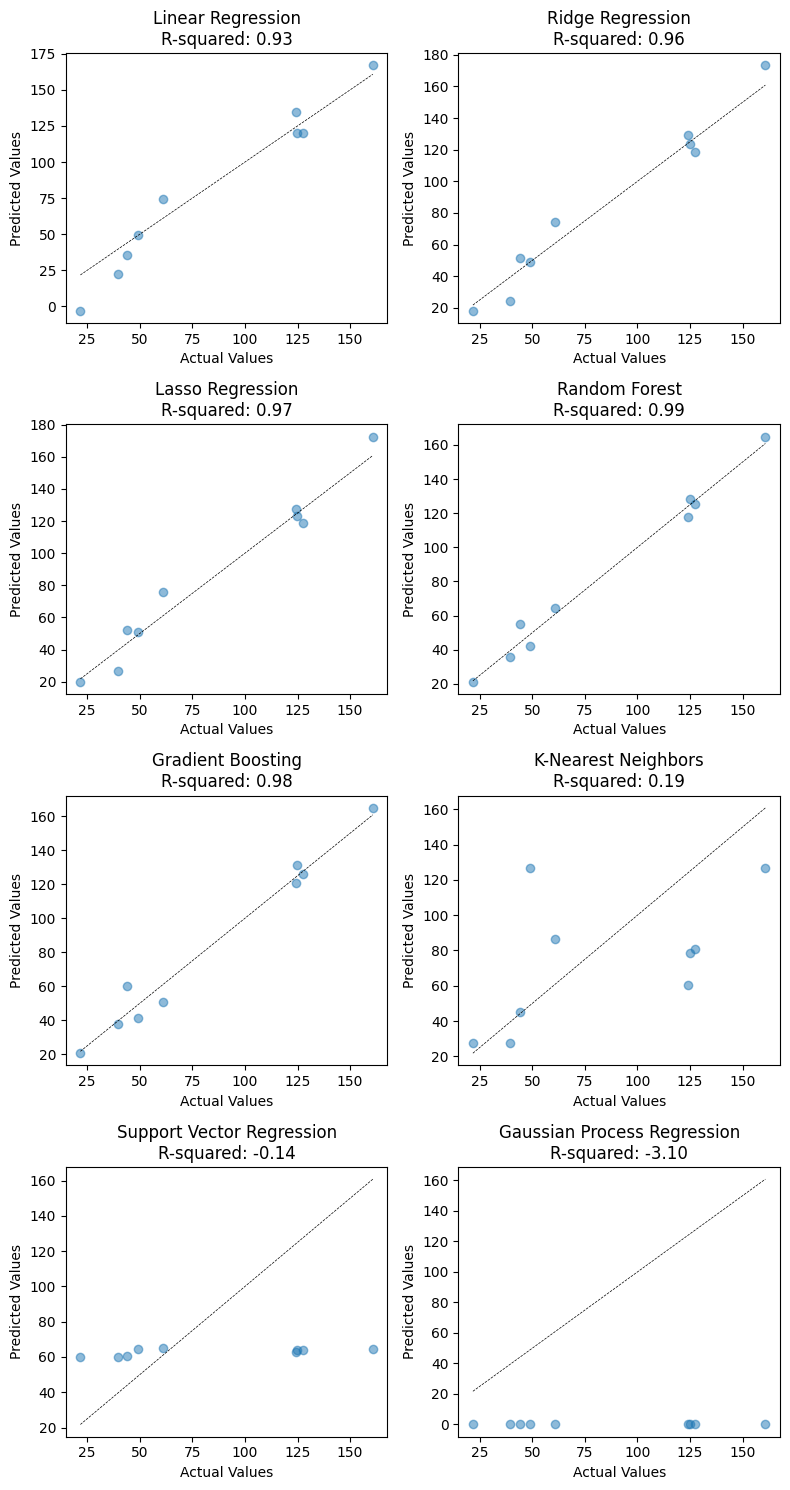

In [25]:
from sklearn.metrics import r2_score

# Train and predict using each algorithm and plot the results
plt.figure(figsize=(8, 15))
for i, (algo_name, model) in enumerate(algorithms, 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    print(f"Algorithm: {algo_name}, R-squared value : {r_squared}")
    plt.subplot(4, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{algo_name}\nR-squared: {r_squared:.2f}')

plt.tight_layout()
plt.show()


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Create empty lists to store the evaluation metrics
algo_names = []
vaf_values = []
rmse_values = []
r_values = []
r_squared_values = []

# Loop through each algorithm, train, predict, and evaluate the performance
for algo_name, model in algorithms:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    vaf = (1 - mse / np.var(y_test)) * 100
    r_value = np.corrcoef(y_test, y_pred)[0, 1]
    r_squared = r2_score(y_test, y_pred)

    # Append the values to the corresponding lists
    algo_names.append(algo_name)
    vaf_values.append(vaf)
    rmse_values.append(rmse)
    r_values.append(r_value)
    r_squared_values.append(r_squared)

# Create a table to display the results
import pandas as pd

results_df = pd.DataFrame({
    "Algorithm": algo_names,
    "VAF (%)": vaf_values,
    "RMSE": rmse_values,
    "R": r_values,
    "R-squared": r_squared_values
})

# Format the values with two decimal points
results_df["VAF (%)"] = results_df["VAF (%)"].map("{:.2f}".format)
results_df["RMSE"] = results_df["RMSE"].map("{:.2f}".format)
results_df["R"] = results_df["R"].map("{:.2f}".format)
results_df["R-squared"] = results_df["R-squared"].map("{:.2f}".format)

print(results_df)


                     Algorithm  VAF (%)   RMSE     R R-squared
0            Linear Regression    93.17  12.41  0.98      0.93
1             Ridge Regression    96.32   9.10  0.99      0.96
2             Lasso Regression    96.56   8.80  0.98      0.97
3                Random Forest    98.16   6.44  0.99      0.98
4            Gradient Boosting    97.80   7.03  0.99      0.98
5          K-Nearest Neighbors    19.43  42.61  0.53      0.19
6    Support Vector Regression   -14.23  50.73  0.61     -0.14
7  Gaussian Process Regression  -310.34  96.15  0.31     -3.10


**General observation:** The addition of two extra features (i.e., density and porosity) generally led to a slight decrease in model performance for most algorithms. The models trained with 6 features showed slightly worse fit and slightly higher errors compared to the models trained with 4 features. It's possible that the two extra features might not have provided significant additional information, and their inclusion might have introduced noise or overfitting to some extent. As a result, careful feature selection and engineering are crucial to building better models.

**Scientific understanding of the results:** Porosity and density are critical rock properties that can significantly affect the strength and mechanical behavior of rocks. In many cases, they can be crucial predictors of UCS. However, the impact of additional features on model performance can vary depending on the complexity of the relationships between these features and the target variable (UCS). Sometimes, additional features may not contribute meaningfully, or they may even introduce noise, leading to a slight decrease in model performance.

To properly assess the effect of these two extra features in developing a better model for predicting UCS, additional analysis and exploration are necessary. Techniques such as **feature importance analysis, correlation analysis, and model evaluation on separate test data** are important to understand how porosity and density impact the UCS prediction.

## Feature importance analysis

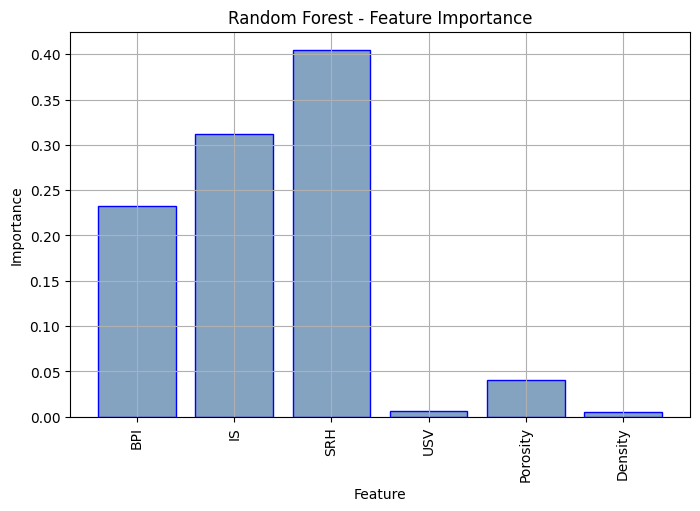

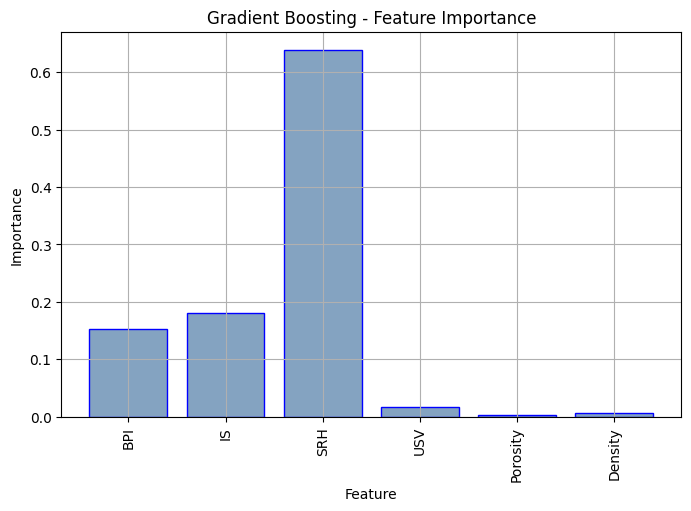

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split

# Feature importance analysis for Random Forest and Gradient Boosting
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_feature_importance = rf_model.feature_importances_

gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_feature_importance = gb_model.feature_importances_

# Get the feature names from the dataset (assuming you have a DataFrame called 'df')
data = data.drop(columns=["UCS","Sample no."])

feature_names = data.columns

# Plot feature importance for Random Forest
plt.figure(figsize=(8, 5))
plt.bar(feature_names, rf_feature_importance, color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest - Feature Importance')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(8, 5))
plt.bar(feature_names, gb_feature_importance, color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Gradient Boosting - Feature Importance')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
